# Model Training

# 1) Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

# 2) Collecting Data

In [49]:
df = pd.read_csv("students-data.csv")

In [50]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [51]:
X = df.drop(columns=['reading score'],axis=1)

In [52]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,69,88
2,female,group B,master's degree,standard,none,90,93
3,male,group A,associate's degree,free/reduced,none,47,44
4,male,group C,some college,standard,none,76,75


# 3)  Data Analysis

In [53]:
print("Categories in 'gender variable: ",end=" ")
print(df["gender"].unique())
print("Categories in 'race ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())
print("Categories in parental level of education' variable:   ", end=" ")
print(df["parental level of education"].unique())
print("Categories in 'lunch' variable:",end=" ")
print(df["lunch"].unique())
print("Categories in 'test preparation course' variable:  ", end=" ")
print(df["test preparation course"].unique())


Categories in 'gender variable:  ['female' 'male']
Categories in 'race ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [54]:
Y=df['reading score']

In [55]:
Y

0      72
1      90
2      95
3      57
4      78
       ..
995    99
996    55
997    71
998    78
999    86
Name: reading score, Length: 1000, dtype: int64

In [56]:
num_cols=X.select_dtypes(exclude="object").columns
cat_cols=X.select_dtypes(include="object").columns

# 4) Data Preprocessing

In [57]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_trans=StandardScaler()
oh_tran=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder", oh_tran,cat_cols),
        ("StandardScaler", num_trans, num_cols),
    ]

)

In [58]:
X=preprocessor.fit_transform(X)

In [59]:
X.shape

(1000, 19)

# 5) Selection of Model

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=23)

In [61]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mae,rmse,r2

In [62]:
models={
    "LR":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNN":KNeighborsRegressor(),
    "DT":DecisionTreeRegressor(),
    "RF":RandomForestRegressor()
}

model_list=[]
r2_list =[]

# 6) Model Training

In [63]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train, y_train) 
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('------------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LR
Model performance for Training set
- Root Mean Squared Error: 4.0161
- Mean Absolute Error: 3.2523
- R2 Score: 0.9249
------------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.7485
- Mean Absolute Error: 2.9803
- R2 Score: 0.9312


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.3367
- Mean Absolute Error: 3.5153
- R2 Score: 0.9125
------------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.0991
- Mean Absolute Error: 3.2597
- R2 Score: 0.9177


Ridge
Model performance for Training set
- Root Mean Squared Error: 4.0096
- Mean Absolute Error: 3.2491
- R2 Score: 0.9252
------------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.7560
- Mean Absolute Error: 2.9844
- R2 Score: 0.9309


KNN
Model performance for Training set
- Root Mean Squared Error: 4.9843
- Mean Absolute Error: 3.8808
- R2 Score: 0.8844
------------------------------------
Model perform

In [64]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
0,LR,0.931213
2,Ridge,0.930938
1,Lasso,0.917743
5,RF,0.916137
3,KNN,0.842357
4,DT,0.841853


# 7) Choosing Best Model

In [65]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 93.12


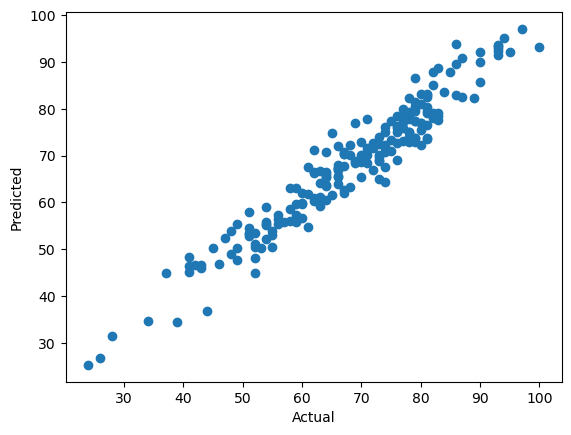

In [66]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

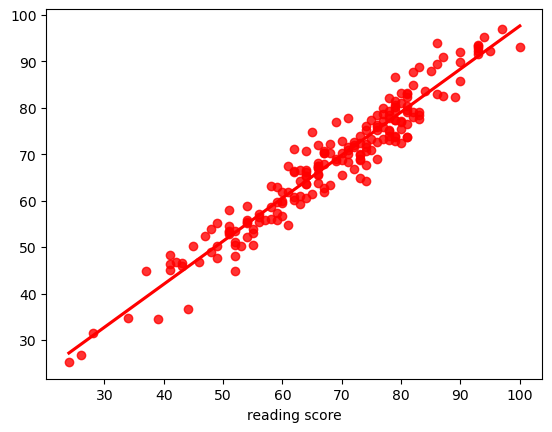

In [67]:
sb.regplot(x=y_test,y=y_pred,ci=None,color='red');

In [68]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference
519,78,79.359375,-1.359375
837,82,79.031250,2.968750
208,81,79.046875,1.953125
525,60,61.921875,-1.921875
978,41,48.375000,-7.375000
...,...,...,...
647,62,71.093750,-9.093750
481,59,57.375000,1.625000
134,79,73.671875,5.328125
366,58,56.078125,1.921875
